# Data Import and Wrangling

In [65]:
import pandas as pd
import os

df = pd.read_excel(r'/mnt/c/work/Project_bu_trist/NEW DATA KUESIONER_SRQ20.xlsx', header=None)

#transpose columns
df = df.T
df.columns = df.iloc[0]  
df = df[1:]          

In [66]:
# Replace NaN values with 0 and convert to integer type
df = df.fillna(0).astype(int)

/tmp/ipykernel_46840/1947721011.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [67]:
df

,Apakah Sdr sering sakit kepala?,Apakah nafsu makan Sdr menurun?,Apakah Sdr tidak bisa tidur nyenyak?,Apakah Sdr mudah merasa takut?,Apakah tangan Sdr gemetar?,"Apakah Sdr merasa cemas, tegang, atau khawatir?",Apakah pencernaan Sdr buruk?,Apakah Sdr mengalami kesulitan untuk berfikir jernih?,Apakah Sdr merasa tidak bahagia?,Apakah Sdr lebih sering menangis dari biasanya?,Apakah Sdr sulit menikmati kegiatan sehari-hari?,Apakah Sdr merasa kesulitasn untuk mengambil keputusan?,Apakah hasil kerja sehari-hari Sdr memburuk?,Apakah Sdr merasa tidak bisa melakukan hal yang bermanfaat dalam hidup?,Apakah Sdr kehilangan minat untuk melakukan berbagai macam hal?,Apakah Sdr merasa sebagai orang yang tidak berharga?,Apakah Sdr memiliki pemikiran untuk mengakhiri hidup?,Apakah Sdr merasa lelah sepanjang waktu?,Apakah Sdr merasakan perasaan tidak nyaman di perut?,Apakah Sdr mudah merasa lelah?
1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0
2,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1
3,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1
4,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,1
5,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
396,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Labeling

In [68]:
# Labeling
df['label'] = df.sum(axis=1).apply(lambda x: 1 if x >= 5 else 0)


# Modeling

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(class_report)



Accuracy: 0.90
Confusion Matrix:
[[25  1]
 [ 7 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        26
           1       0.98      0.87      0.92        54

    accuracy                           0.90        80
   macro avg       0.88      0.92      0.89        80
weighted avg       0.91      0.90      0.90        80



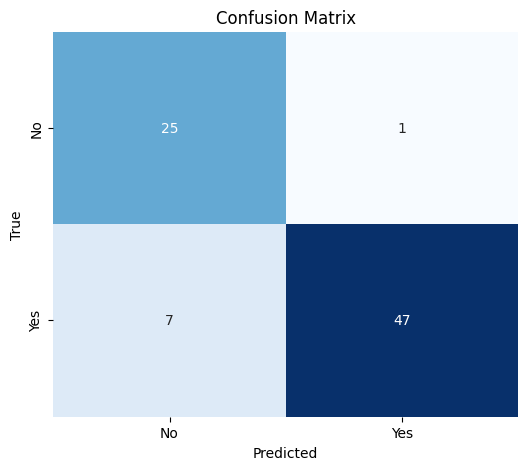

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [71]:
# Trying  hiperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Fully grown trees unless specified
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, digits=2)

# Display the results
print(f"\nAccuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.94

Confusion Matrix:
[[31  0]
 [ 5 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        31
           1       1.00      0.90      0.95        49

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



# Visualisasi Tree

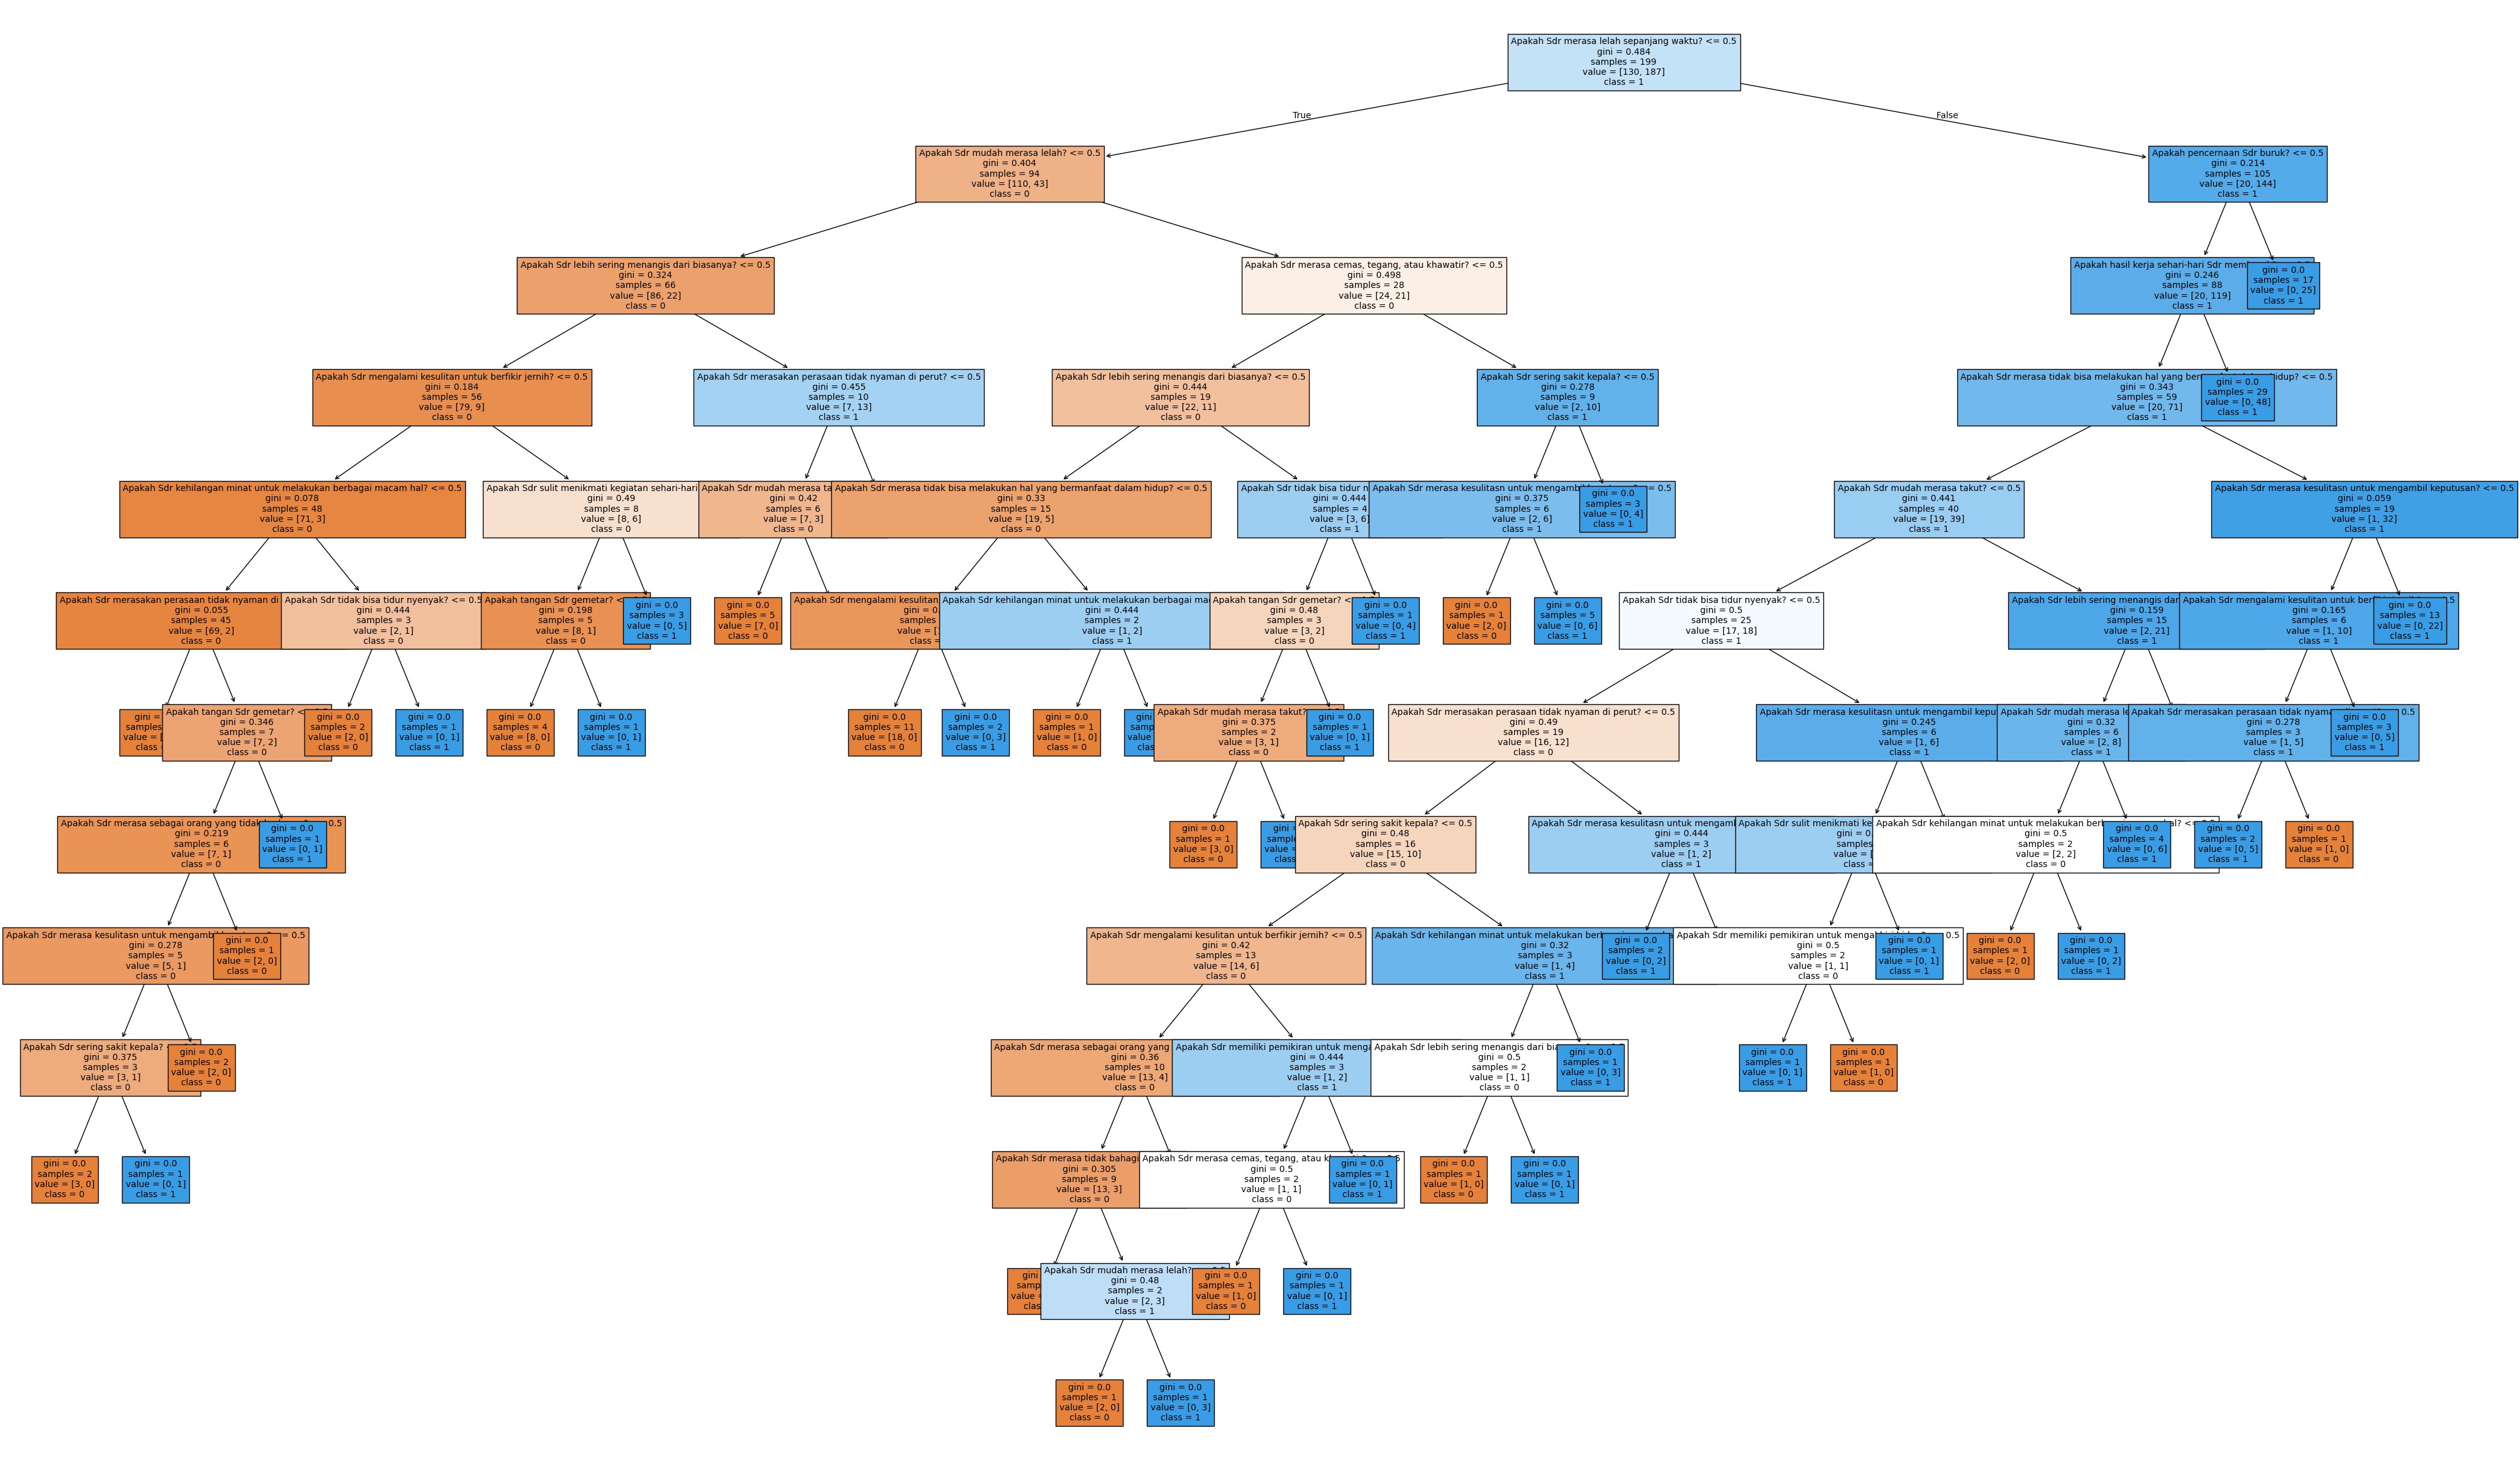

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract one tree from the Random Forest
tree = model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(50, 30))
plot_tree(
    tree,
    filled=True,              # Color the nodes by their class
    feature_names=X.columns,  # Replace with actual feature names
    class_names=model.classes_.astype(str),  # Class names as strings
    fontsize=10
)
plt.show()


# feature importance

                                              Feature  Importance
17           Apakah Sdr merasa lelah sepanjang waktu?    0.125423
19                     Apakah Sdr mudah merasa lelah?    0.084038
0                     Apakah Sdr sering sakit kepala?    0.077626
10   Apakah Sdr sulit menikmati kegiatan sehari-hari?    0.067860
5     Apakah Sdr merasa cemas, tegang, atau khawatir?    0.064672
7   Apakah Sdr mengalami kesulitan untuk berfikir ...    0.064427
11  Apakah Sdr merasa kesulitasn untuk mengambil k...    0.062878
15  Apakah Sdr merasa sebagai orang yang tidak ber...    0.060485
3                      Apakah Sdr mudah merasa takut?    0.059819
12       Apakah hasil kerja sehari-hari Sdr memburuk?    0.052017
9     Apakah Sdr lebih sering menangis dari biasanya?    0.038099
14  Apakah Sdr kehilangan minat untuk melakukan be...    0.037814
4                          Apakah tangan Sdr gemetar?    0.035372
18  Apakah Sdr merasakan perasaan tidak nyaman di ...    0.033448
2         

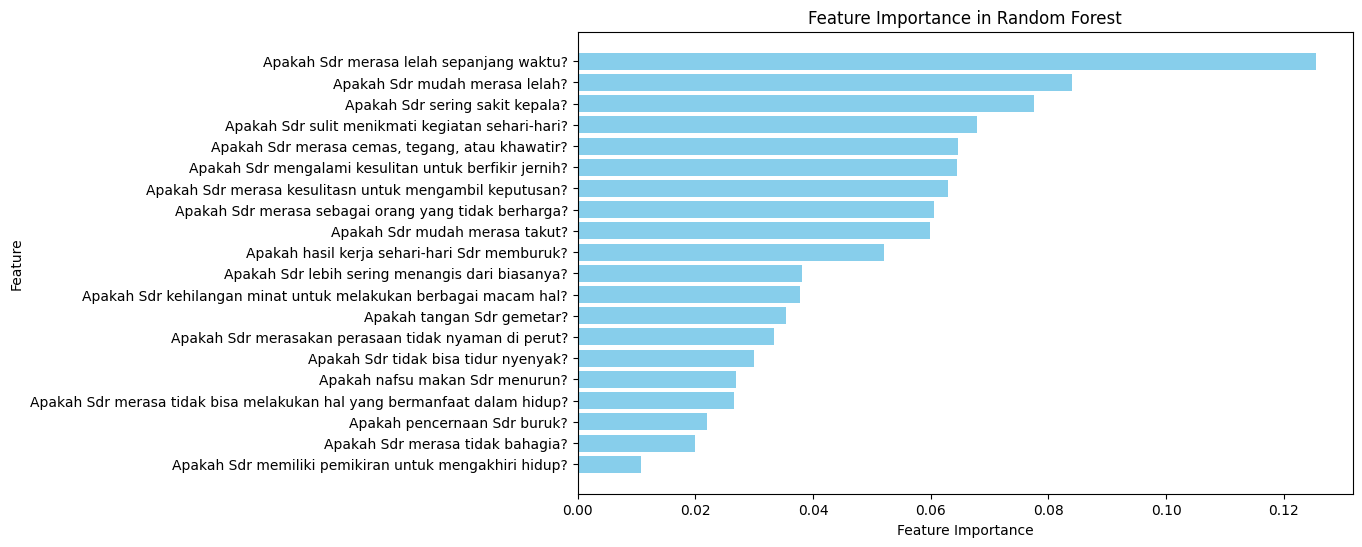

In [73]:
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Flip the y-axis for better readability
plt.show()

# Save Model

In [78]:
# save the model
import joblib

joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [75]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB  # Import the Naive Bayes classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming `df` is your DataFrame
X = df.drop(columns='label')
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.95
Confusion Matrix:
[[25  1]
 [ 3 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.98      0.94      0.96        54

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [77]:
import pandas as pd
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming `df` is your DataFrame
X = df.drop(columns='label')
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.99
Confusion Matrix:
[[26  0]
 [ 1 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.98      0.99        54

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

